# *Data Analysis Project:* *Bike Sharing Dataset*
*   *Name* : Saprina Saputri
*   E-mail : saprina.saputri@mail.ugm.ac.id
*   ID Bangkit : M008D4KX3152


# Determine Business Questions
1.   What are the bike rental trends in 2011 and 2012?
2.   How does weather condition affect the number of bike users?
3.   What is the comparison of bike renters between casual users and registered users?
4.   Does the season affect bike renters based on casual and registered users?
5.   How do changes in season and weather conditions influence the total bike rentals?
6.   What is the impact of temperature variables (temp and atemp) and humidity (hum) on total bike renters?
7.   What are the patterns of bike rentals on holidays, weekdays, and working days?






# Preparing All Necessaries Library
**Ensure all necessary libraries have been imported**

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# *Data Wrangling*
**Gathering Data**

In [111]:
# Connect Google Colab with Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
#Load table
day = pd.read_csv("/content/drive/MyDrive/Bangkit/Bike-sharing-dataset/day.csv")
hour = pd.read_csv("/content/drive/MyDrive/Bangkit/Bike-sharing-dataset/hour.csv")

In [113]:
day #Show day table

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [114]:
hour #show hour table

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Assessing Data**

In [115]:
day.info() #check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [116]:
day.isna().sum() #check whether there are missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [117]:
day.duplicated().sum() #check whether there is any duplication in the data

0

In [118]:
day.describe() #check parameter statistics

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [119]:
hour.info()#check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [120]:
hour.isna().sum() #check whether there are missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [121]:
hour.duplicated().sum() #check whether there is any duplication in the data

0

In [122]:
hour.describe() #check parameter statistics

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Cleaning Data**

In [123]:
# Delete unused tables because not relevan with bussiness questions
del hour

In [124]:
# Drop variables in the day table that are not used because not any correlation with bussiness questions
day.drop(columns=['instant', 'windspeed'], inplace=True)
day.head() #Show head of day table

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [125]:
# Detailing column name
day.rename(columns={'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_cond', 'cnt': 'count'}, inplace=True)
day.head()


,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [126]:
#Detailing number in season, year, month day, weather_cond
day["season"] = day["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
day["year"] = day["year"].map({0: "2011", 1: "2012"})
day["month"] = day["month"].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
day["weekday"] = day["weekday"].map({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})
day["weather_cond"] = day["weather_cond"].map({1: "Clear/Partly Cloudy", 2: "Misty/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"})

In [127]:
day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [128]:
# Change the data type to datetime
day['dateday'] = pd.to_datetime(day['dateday'])

# List of columns to convert to category data type
categorical_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_cond']

# Change column data type to category using loop
for column in categorical_columns:
    day[column] = day[column].astype('category')

day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [129]:
day.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


In [130]:
#save clean data in CSV form
day.to_csv('day_clean.csv', index=False)

# Exploratory Data Analysis

In [131]:
day.groupby(by=["year", "month"], observed=False)["count"].agg(['max', 'min', 'mean', 'sum']) #Explore tren in bike-sharing from 2011 to 2012

max   min         mean     sum
year month                                 
2011 Apr    5312   795  3162.333333   94870
     Aug    5895  1115  4409.387097  136691
     Dec    3940   705  2816.870968   87323
     Feb    2927  1005  1721.964286   48215
     Jan    1985   431  1231.903226   38189
     Jul    6043  3285  4559.387097  141341
     Jun    5515  3767  4783.733333  143512
     Mar    3239   605  2065.967742   64045
     May    5805  2633  4381.322581  135821
     Nov    4486  1495  3405.566667  102167
     Oct    5511   627  3984.225806  123511
     Sep    5423  1842  4247.266667  127418
2012 Apr    7460  1027  5807.466667  174224
     Aug    7865  4549  6919.451613  214503
     Dec    6606   441  3990.741935  123713
     Feb    5062  1529  3556.448276  103137
     Jan    4521  1301  3120.774194   96744
     Jul    8173  4459  6567.967742  203607
     Jun    8120  4127  6761.000000  202830
     Mar    8362  3194  5318.548387  164875
     May    8294  2843  6318.225806  195865
     Nov    6852  2277  5088.800000  152664
     Oct    8156    22  6414.225806  198841
     Sep    8714  4073  7285.766667  218573

In [132]:
# Group data by year and calculate maximum, minimum and total values for 'casual' and 'registered' columns
day.groupby("year").agg({'casual': ['max', 'min', 'sum'], 'registered': ['max', 'min', 'sum']})

casual             registered              
        max min     sum        max  min      sum
year                                            
2011   3065   9  247252       4614  416   995851
2012   3410   2  372765       6946   20  1676811

In [133]:
# Group bicycle renters (both casual and registered) based on weather conditions
day.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Rain/Snow      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

In [134]:
#Group bicycle renters (both casual and registered) by weekday
day.groupby(by='weekday').agg({
    'count':['max','min','mean']
    })

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

In [135]:
#Group bicycle renters (both casual and registered) by holiday
day.groupby(by = ["holiday"], observed=False).agg({
    "count": ["sum", "max", "min", "mean"]
})

count                         
             sum   max   min         mean
holiday                                  
0        3214244  8714    22  4527.104225
1          78435  7403  1000  3735.000000

In [136]:
# Group bicycle renters (both casual and registered) by workingday
day.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

In [137]:
# Group bicycle renters (both casual and registered) by season
day.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

In [138]:
# Group temp, hum, and humidity based on season
day.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

In [139]:
# Group bicycle renters based on season and weather condition
day.groupby(by = ["season", "weather_cond"], observed=False).agg({
    "count": ["max", "min", "mean"]
})

count                   
                             max   min         mean
season weather_cond                                
Fall   Clear/Partly Cloudy  8714  3285  5878.257353
       Light Rain/Snow      4459  1842  2751.750000
       Misty/Cloudy         7582  1115  5222.479167
Spring Clear/Partly Cloudy  6312   431  2811.135135
       Light Rain/Snow      2169   441   934.750000
       Misty/Cloudy         7836   605  2357.166667
Summer Clear/Partly Cloudy  8294  2028  5548.548673
       Light Rain/Snow      1685   795  1169.000000
       Misty/Cloudy         8362  1471  4236.705882
Winter Clear/Partly Cloudy  8555  1495  5043.563107
       Light Rain/Snow      4639    22  1961.600000
       Misty/Cloudy         7852  1096  4654.000000

**1st Question**

<ipython-input-140-48baf71365eb>:12: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(


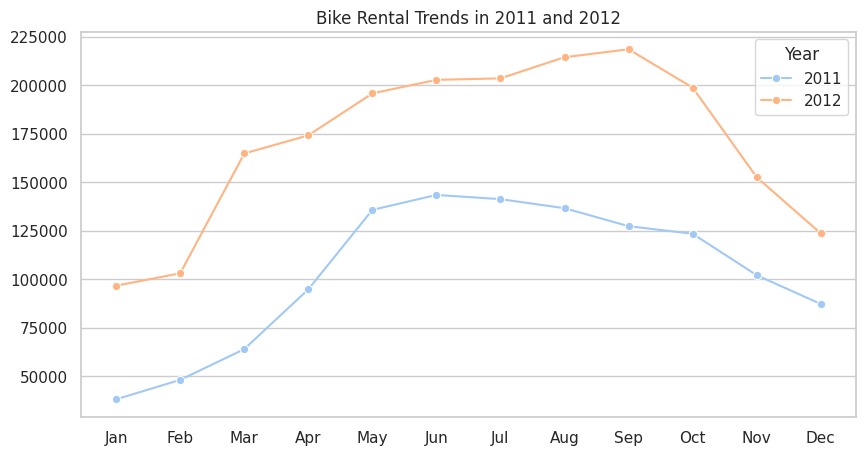

In [140]:
# What are the bike rental trends in 2011 and 2012?

day["month"] = pd.Categorical(day["month"], categories=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],ordered=True) #sort month index
# Group data by year and month for total bicycle rentals
monthly_counts = day.groupby(by=["year", "month"])["count"].sum().reset_index()
# Set the style
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette=palette,
    marker="o"
)

# Set axis labels and titles
plt.xlabel(None)
plt.ylabel(None)
plt.title("Bike Rental Trends in 2011 and 2012")

# Displays the legend and removes the grid on the x-axis
plt.legend(title="Year", loc="upper right")
plt.gca().xaxis.grid(False)

# Displays the plot
plt.show()

There is a difference between the highest and lowest data in the number of bike rentals in the months of 2011 and 2012. In 2011, the number of rentals peaked in June and reached its lowest point in January, while in 2012, the peak occurred in September and the lowest point remained the same in January. Based on the visualization above, it can be observed that the total number of bikes rented in 2012 is higher than in 2011.

**2nd Question**

<ipython-input-141-6f8afa52a712>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


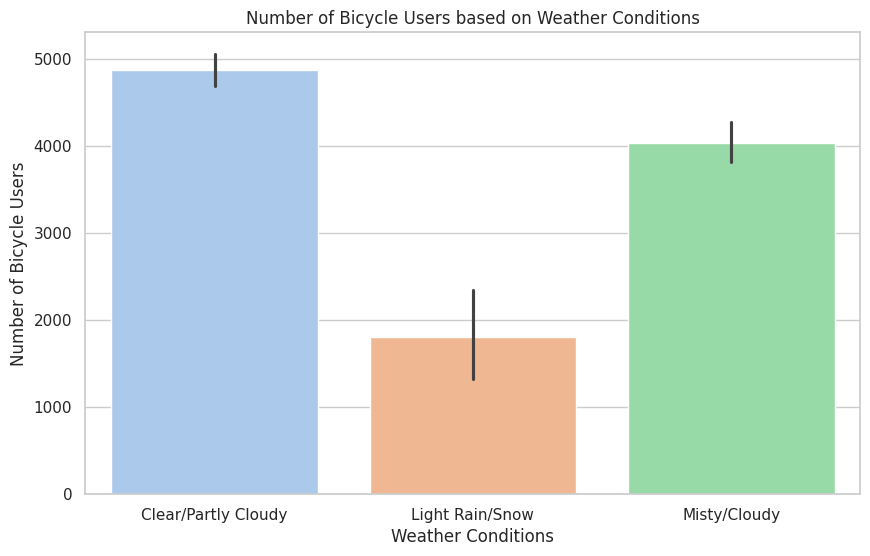

In [141]:
# How does weather condition affect the number of bike users?
# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day,
    palette='pastel'
)

# Add axis titles and labels
plt.title('Number of Bicycle Users based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Bicycle Users')

# Display the plot
plt.show()


Based on the data visualization using the boxplot above, it can be observed that there is a relationship between weather conditions and bike renters. Weather conditions during clear/Partly Cloudy are the most preferred, followed by Misty/Cloudy weather, and lastly, slightly Light Rain/Snow weather is the least preferred.

**3rd Question**

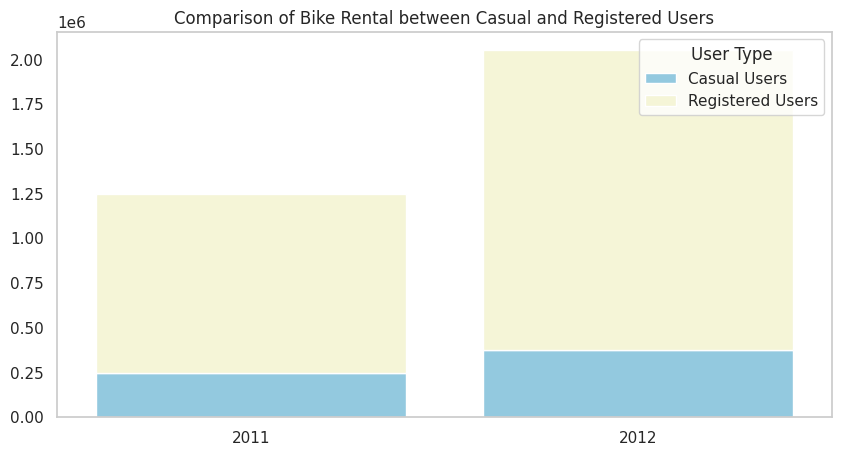

In [142]:
# What is the comparison of bike renters between casual users and registered users?
# Group data by year for total bicycle rentals by user type
user_counts = day.groupby(by="year")[["casual", "registered"]].sum().reset_index()

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=user_counts, x="year", y="casual", color="skyblue", label="Casual Users")
sns.barplot(data=user_counts, x="year", y="registered", color="lightgoldenrodyellow", label="Registered Users", bottom=user_counts["casual"])

# Add axis titles and labels
plt.title("Comparison of Bike Rental between Casual and Registered Users")
plt.xlabel(None)
plt.ylabel(None)

# Display the legend
plt.legend(title="User Type", loc="upper right")

# Removes the grid
plt.grid(False)

# Displays the plot
plt.show()

Both in 2011 and 2012, the number of registered users significantly outnumbered casual users in bike rentals. Their segment (light golden rod yellow) is much larger than that of casual users (skyblue). Additionally, from 2011 to 2012, there was an overall increase in bike rentals for both user types. The number of bikes rented by registered users almost reached 2 million in 2012.

**4th Question**

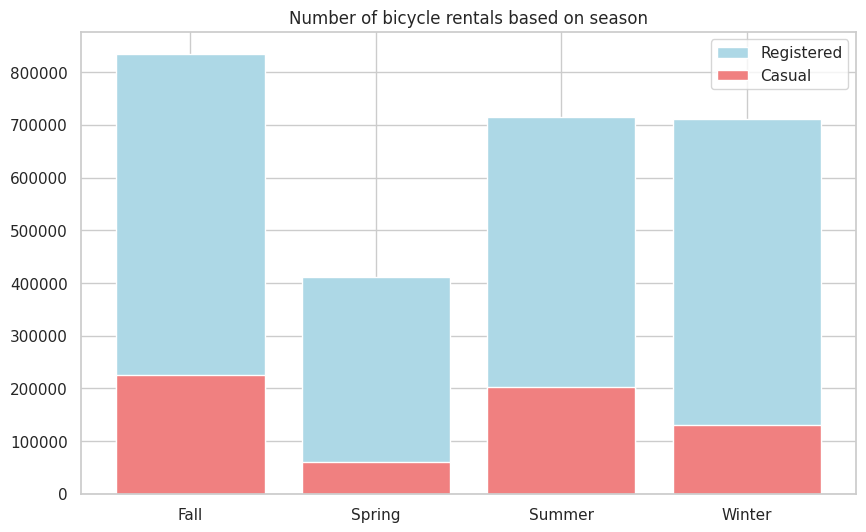

In [143]:
# Does the season affect bike renters based on casual and registered users?
# Groups data by season and counts the number of registered and unregistered uses
seasonal_usage = day.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Create bar plot
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='lightblue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='lightcoral'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of bicycle rentals based on season')
plt.legend()
plt.show()

Based on the barplot visualization above, it can be inferred that among all seasons, bike users (Casual and Registered) enjoy fall the most, followed by summer, winter, and finally spring.

**5th Question**

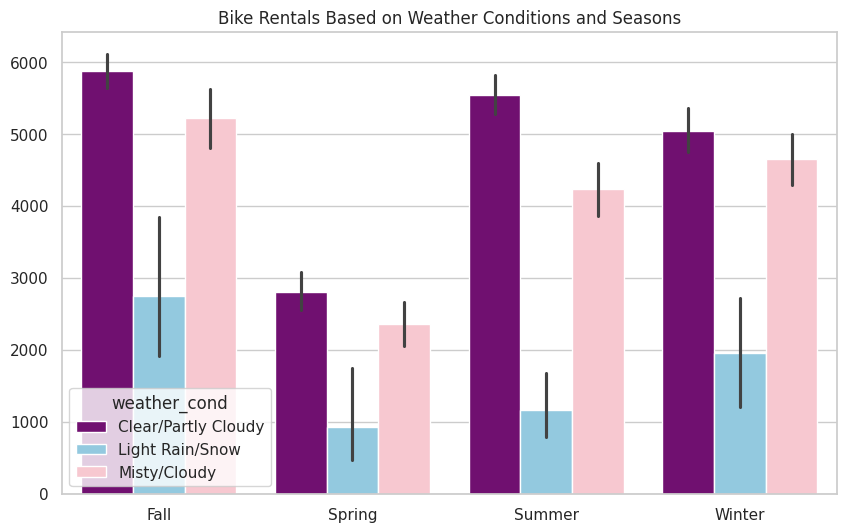

In [144]:
# How do changes in season and weather conditions influence the total bike rentals?
plt.figure(figsize=(10,6))
sns.barplot(
    x="season",
    y="count",
    hue="weather_cond",
    palette=["purple", "skyblue", "pink"],
    data=day
)

plt.title("Bike Rentals Based on Weather Conditions and Seasons")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Based on the plot above, it is evident that summer and fall seasons have the highest bike rentals, reaching nearly 6,000 rentals during Clear/Partly Cloudy weather. Conversely, the number of rentals decreases significantly during Light Rain/Snow, winter, and spring seasons, and diminishes further during Misty/Cloudy weather.

**6th Question**

Text(0.5, 1.0, 'Humidity vs Count')

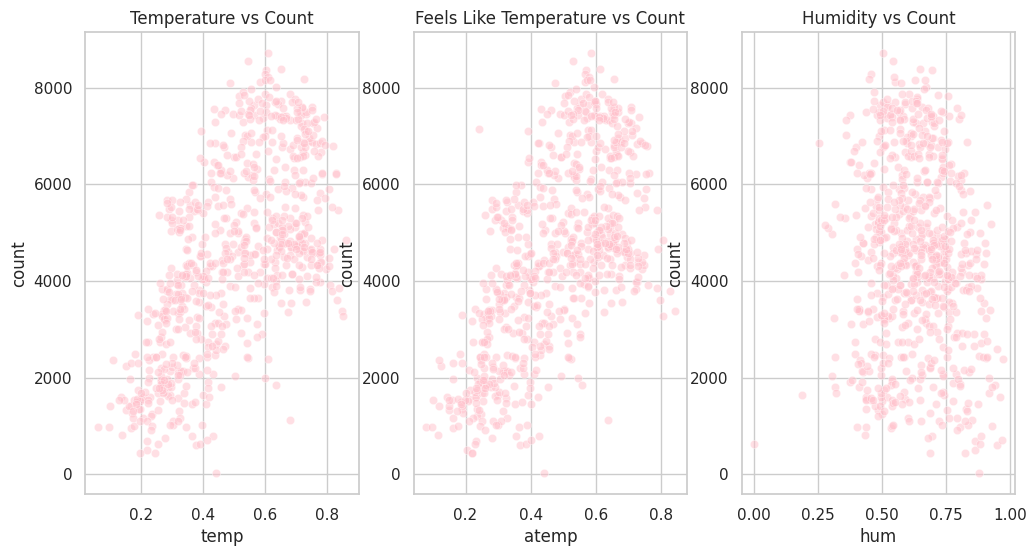

In [145]:
# What is the impact of temperature variables (temp and atemp) and humidity (hum) on total bike renters?
plt.figure(figsize=(12, 6))
# Scatter plot for "temp" vs "count"
plt.subplot(1, 3, 1)
sns.scatterplot(
    x="temp",
    y="count",
    data=day,
    alpha=0.5,
    color='pink'
)
plt.title("Temperature vs Count")

# Scatter plot for "atemp" vs "count"
plt.subplot(1, 3, 2)
sns.scatterplot(
    x="atemp",
    y="count",
    data=day,
    alpha=0.5,
    color='pink'
)
plt.title("Feels Like Temperature vs Count")

# Scatter plot for "hum" vs "count"
plt.subplot(1, 3, 3)
sns.scatterplot(
    x="hum",
    y="count",
    data=day,
    alpha=0.5,
    color='pink'
)
plt.title("Humidity vs Count")

Based on the scatter plot above, the following information can be obtained:
*   The relationship between temp and count shows a positive correlation between the two variables.
*   The relationship between atemp and count also shows a positive correlation between the two variables.
*   The relationship between hum and count shows a slightly negative correlation, but it is not very significant as the left-leaning is not very apparent.

**In conclusion**, if the temperature (temp and atemp) increases, bike users also tend to increase. However, the influence of humidity is minimal, although it tends to decrease the number of bike users.

**7th Question**

<ipython-input-146-c90a8b1730d5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-146-c90a8b1730d5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-146-c90a8b1730d5>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


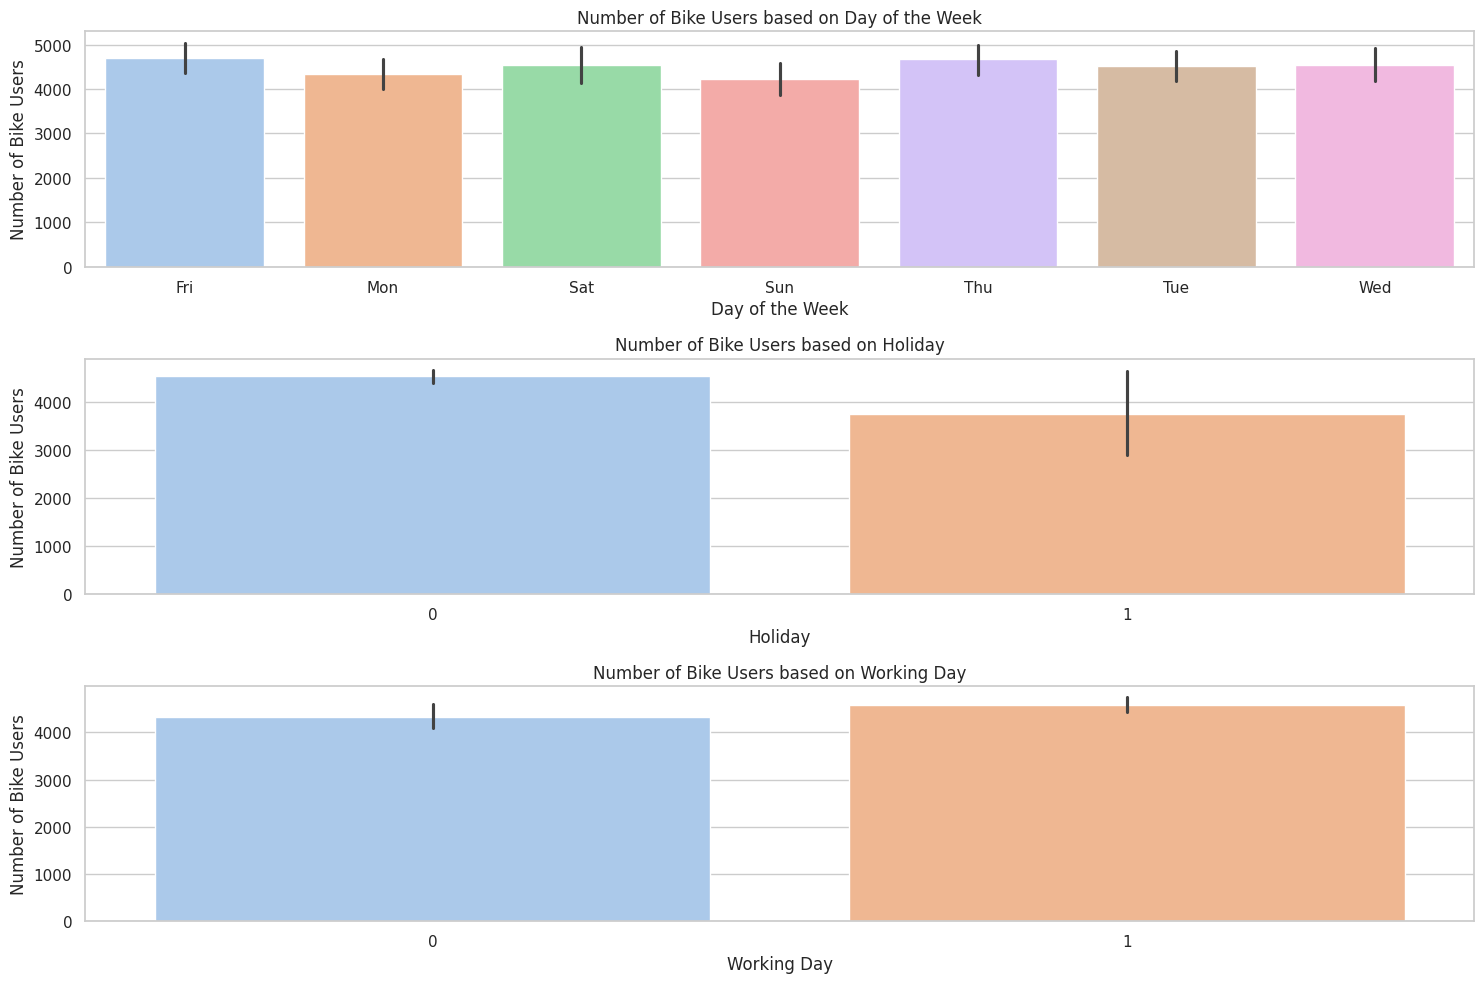

In [146]:
#What are the patterns of bike rentals on holidays, weekdays, and working days?
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Based on weekday
sns.barplot(
    x='weekday',
    y='count',
    data=day,
    ax=axes[0],
    palette='pastel'
)
axes[0].set_title('Number of Bike Users based on Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Bike Users')

# Based on holiday
sns.barplot(
    x='holiday',
    y='count',
    data=day,
    ax=axes[1],
    palette='pastel'
)
axes[1].set_title('Number of Bike Users based on Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Number of Bike Users')

# Based on workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day,
    ax=axes[2],
    palette='pastel'
)
axes[2].set_title('Number of Bike Users based on Working Day')
axes[2].set_xlabel('Working Day')
axes[2].set_ylabel('Number of Bike Users')

plt.tight_layout()
plt.show()

Based on the barplot above, the following information can be gathered:
*   The number of bike renters is higher on weekdays (Monday - Friday) compared to weekends (Saturday and Sunday). 0 indicates weekends and 1 indicates weekdays.
*   The number of bike renters is significantly higher on regular days (non-holidays) compared to holidays (national).
*   Friday has the highest number of bike renters, while Sunday has the lowest number of bike renters.

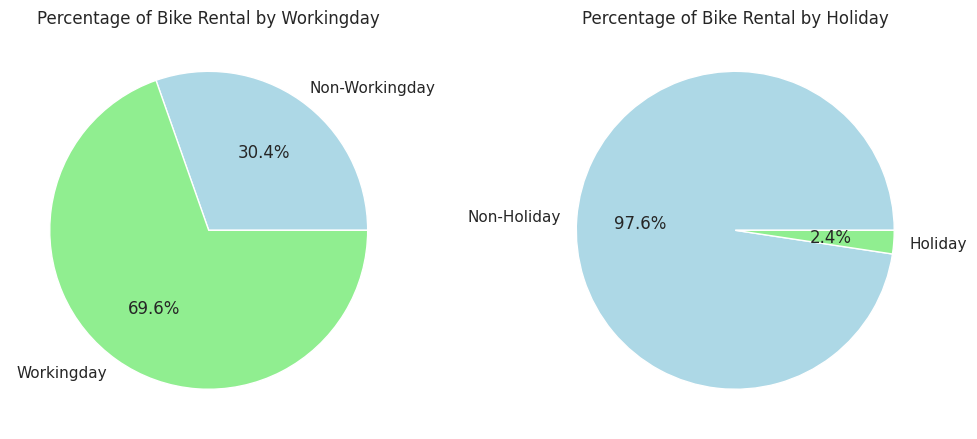

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

# Based on workingday
ax[0].pie(day.groupby("workingday")["count"].sum(),
          labels=["Non-Workingday", "Workingday"],
          autopct='%1.1f%%',
          colors=["lightblue", "lightgreen"])
ax[0].set_title("Percentage of Bike Rental by Workingday")
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Based on holiday
ax[1].pie(day.groupby("holiday")["count"].sum(),
          labels=["Non-Holiday", "Holiday"],
          autopct='%1.1f%%',
          colors=["lightblue", "lightgreen"])
ax[1].set_title("Percentage of Bike Rental by Holiday")
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.tight_layout()
plt.show()

The overall bike rental numbers remain relatively stable across the weekdays, with each day averaging around 5000 rentals. Moreover, there is a notable disparity in bike rental percentages between working days and non-holidays. Precisely, 69.6% of bike rentals are recorded on working days, while only 30.4% are on non-working days. Similarly, the majority (97.6%) of bike rentals take place on non-holidays, with a small portion (2.4%) occurring during holidays.

# Conclusion
1.   There is a difference between the highest and lowest data in the number of bike rentals in the months of 2011 and 2012. In 2011, the number of rentals peaked in June and reached its lowest point in January, while in 2012, the peak occurred in September and the lowest point remained the same in January. Based on the visualization above, it can be observed that the total number of bikes rented in 2012 is higher than in 2011.
2.   Based on the data visualization using the boxplot, it can be observed that there is a relationship between weather conditions and bike renters. Weather conditions during clear/Partly Cloudy are the most preferred, followed by Misty/Cloudy weather, and lastly, slightly Light Rain/Snow weather is the least preferred.
3.   Both in 2011 and 2012, the number of registered users significantly outnumbered casual users in bike rentals. Their segment (light golden rod yellow) is much larger than that of casual users (skyblue). Additionally, from 2011 to 2012, there was an overall increase in bike rentals for both user types. The number of bikes rented by registered users almost reached 2 million in 2012.
4.   Based on the barplot visualization, it can be inferred that among all seasons, bike users (Casual and Registered) enjoy fall the most, followed by summer, winter, and finally spring.
5.   Based on the plot, it is evident that summer and fall seasons have the highest bike rentals, reaching nearly 6,000 rentals during Clear/Partly Cloudy weather. Conversely, the number of rentals decreases significantly during Light Rain/Snow, winter, and spring seasons, and diminishes further during Misty/Cloudy weather.
6.   Based on the scatter plot, the following information can be obtained:
* The relationship between temp and count shows a positive correlation between the two variables.
* The relationship between atemp and count also shows a positive correlation between the two variables.
* The relationship between hum and count shows a slightly negative correlation, but it is not very significant as the left-leaning is not very apparent.

**In conclusion**, if the temperature (temp and atemp) increases, bike users also tend to increase. However, the influence of humidity is minimal, although it tends to decrease the number of bike users.
7.   Based on the barplot, the following information can be gathered:
*   The number of bike renters is higher on weekdays (Monday - Friday) compared to weekends (Saturday and Sunday). 0 indicates weekends and 1 indicates weekdays.
*   The number of bike renters is significantly higher on regular days (non-holidays) compared to holidays (national).
*   Friday has the highest number of bike renters, while Sunday has the lowest number of bike renters.

The overall bike rental numbers remain relatively stable across the weekdays, with each day averaging around 5000 rentals. Moreover, there is a notable disparity in bike rental percentages between working days and non-holidays. Precisely, 69.6% of bike rentals are recorded on working days, while only 30.4% are on non-working days. Similarly, the majority (97.6%) of bike rentals take place on non-holidays, with a small portion (2.4%) occurring during holidays.